Mariem Ben Hmida 2GT1

In [321]:
import pandas as pd #manipulation des tableaux des données 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns # pour tracer le boxplot
import warnings # ignorer les alertes 
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [322]:

df = pd.read_csv("Churn_Modelling.csv")

In [323]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [324]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [325]:
df.shape

(10000, 11)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [327]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [328]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [329]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [330]:
df.isnull().sum() 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

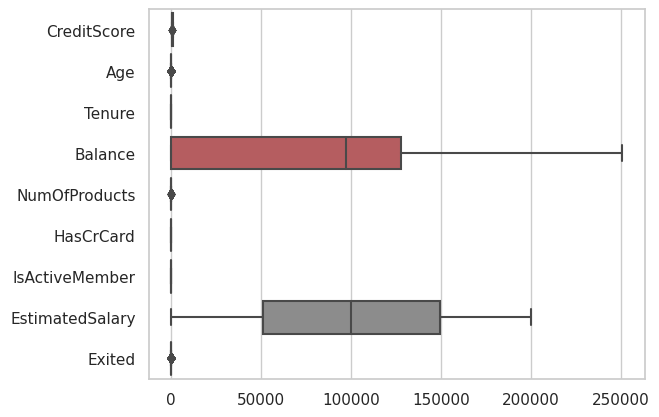

In [331]:
sns.set (style ='whitegrid')
sns.boxplot(df, orient='h')
plt.show()

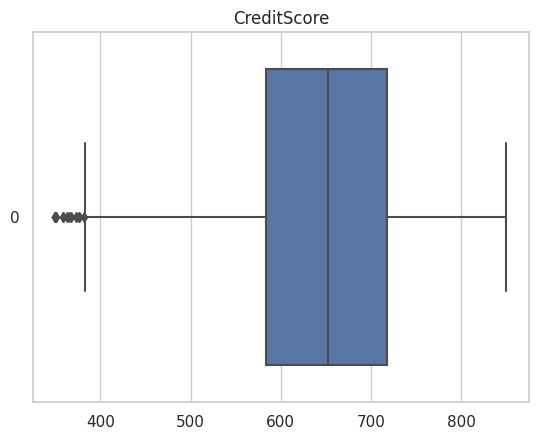

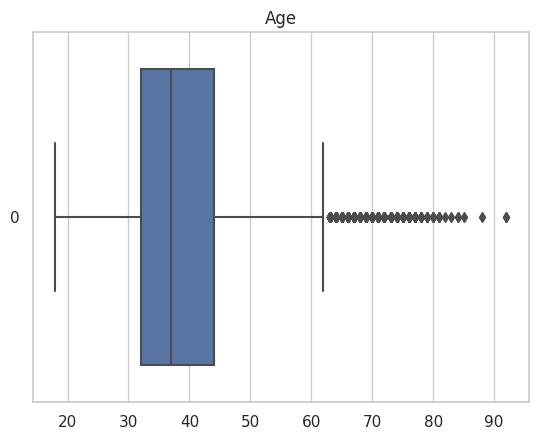

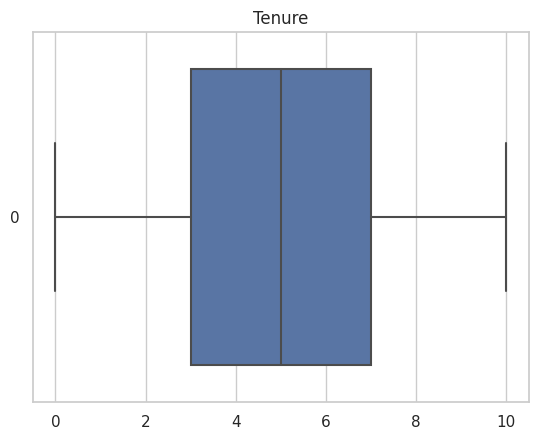

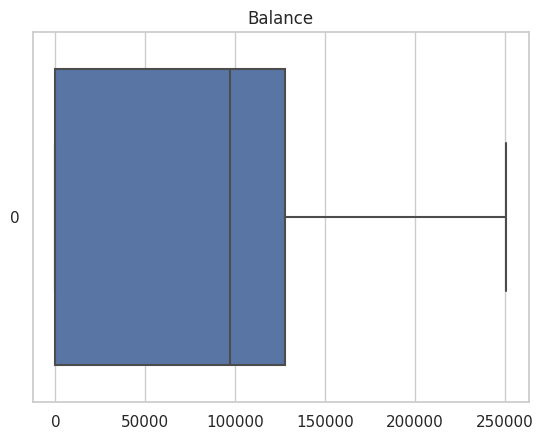

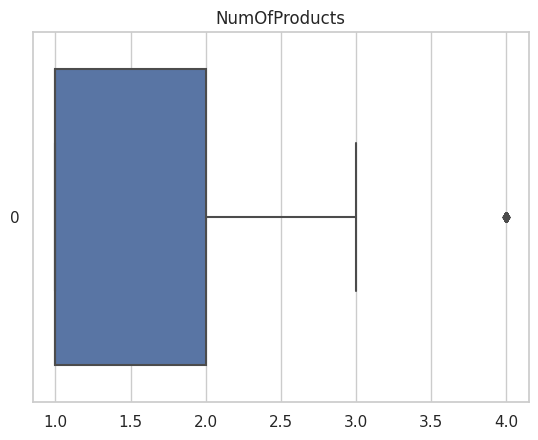

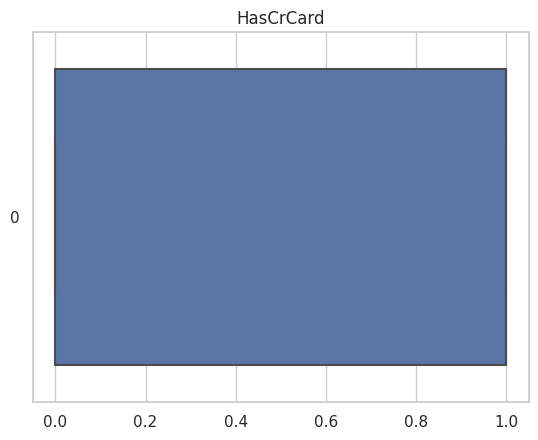

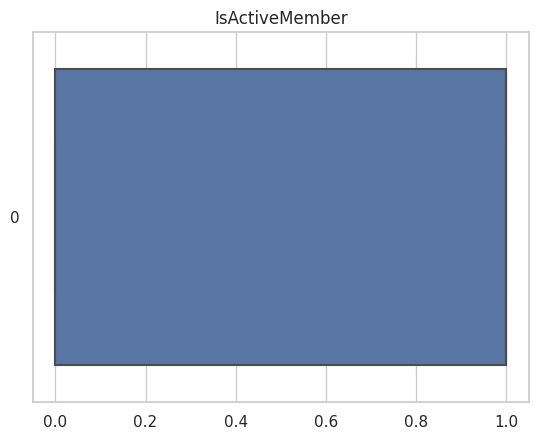

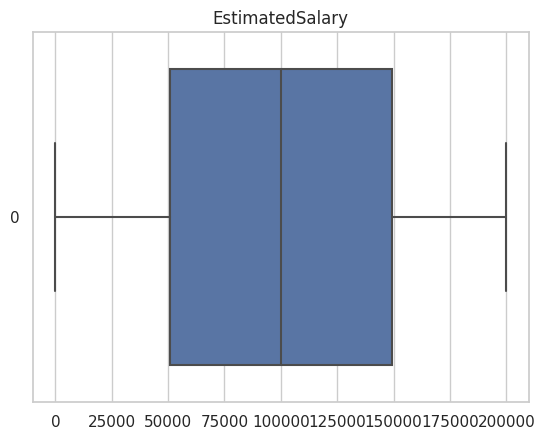

In [332]:

# Liste des features numériques à afficher
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
# Boucle pour afficher chaque boxplot
for feature in num_features:
    sns.set(style='whitegrid')
    sns.boxplot(data=df[feature], orient='h')
    plt.title(feature)
    plt.show()


In [333]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [334]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR = q3-q1
BM=q3+1.5*IQR
BI=q1-1.5*IQR
df=df[df['Age']<= BM]
df= df[df['Age']>= BI]

In [335]:
df.shape

(9641, 11)

In [336]:
q1=df['CreditScore'].quantile(0.25)
q3=df['CreditScore'].quantile(0.75)
IQR = q3-q1
BM=q3+1.5*IQR
BI=q1-1.5*IQR
df=df[df['CreditScore']<= BM]
df= df[df['CreditScore']>= BI]

In [337]:
q1=df['NumOfProducts'].quantile(0.25)
q3=df['NumOfProducts'].quantile(0.75)
IQR = q3-q1
BM=q3+1.5*IQR
BI=q1-1.5*IQR
df=df[df['NumOfProducts']<= BM]
df= df[df['NumOfProducts']>= BI]

In [338]:
df.shape

(9569, 11)

In [339]:
x1 = df.iloc[:, 0:10]
y1 = df.iloc[:,10]

x1 = pd.get_dummies(data=x1, drop_first=True)


In [340]:
x1.shape

(9569, 11)

In [341]:
x1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [342]:
x=x1.values
y=y1.values

In [343]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [344]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler #standardScaler
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train) #appliquer la transformation s'adapter sur les données de x_tain ( min , max ) et enregistrer les valeurs min et max 
X_Test_sc = scaler.transform (X_test)

In [345]:
X_train.shape

(7655, 11)

In [346]:


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Instancier un objet LogisticRegression
logreg = LogisticRegression()

# Entraîner le modèle sur les données standardisées
logreg.fit(X_train_sc, y_train)

# Faire des prédictions sur les données de test
y_pred = logreg.predict(X_Test_sc)

# Calculer les métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Afficher les métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion:\n", confusion_mat)


Accuracy: 0.8484848484848485
Precision: 0.6845637583892618
Recall: 0.2956521739130435
F1 Score: 0.41295546558704455
ROC AUC Score: 0.6328483941585613
Matrice de confusion:
 [[1522   47]
 [ 243  102]]


In [347]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1569
           1       0.68      0.30      0.41       345

    accuracy                           0.85      1914
   macro avg       0.77      0.63      0.66      1914
weighted avg       0.83      0.85      0.82      1914



In [348]:
logreg.coef_



array([[-0.20376116,  4.53766902, -0.15523288,  0.35892877, -0.82653271,
        -0.08004774, -0.90935107,  0.15504889,  0.77281433, -0.01354343,
        -0.52111026]])

In [349]:
logreg.coef_.shape

(1, 11)

In [350]:
logreg.coef_[0,:].shape

(11,)

In [351]:
logreg.intercept_ #teta 0

array([-2.9380423])

In [352]:
X_calcul=X_Test_sc[0,:]

In [353]:
X_calcul.shape

(11,)

In [354]:
w = X_calcul.dot(logreg.coef_[0,:])+logreg.intercept_ #produit membre à membre #teta1*x1+teta2*x2+etc..
print("h_teta = ",w)

h_teta =  [-0.10905806]


In [355]:
from math import exp
h=1/(1+np.exp(-w))

In [356]:
h

array([0.47276248])

In [357]:
logreg.intercept_

array([-2.9380423])

In [358]:
logreg.predict_proba(X_Test_sc) #Programme cherche automatiquement (on a fait des predictions manuellement)
#p(y=0|x) = 1-p(y=x|x)      #p(y=1|x)

array([[0.52723752, 0.47276248],
       [0.83660884, 0.16339116],
       [0.95522448, 0.04477552],
       ...,
       [0.82433202, 0.17566798],
       [0.98665343, 0.01334657],
       [0.80207874, 0.19792126]])

In [359]:
y_test_pred_prob=logreg.predict_proba(X_Test_sc)[:,1]

In [360]:
y_test_pred_prob

array([0.47276248, 0.16339116, 0.04477552, ..., 0.17566798, 0.01334657,
       0.19792126])

In [361]:
y_test_pred_prob[y_test_pred_prob>=0.5].shape

(149,)

In [362]:
y_pred[y_pred==1].shape

(149,)

In [363]:
y_pred[y_pred<0.5].shape

(1765,)

In [364]:
y_pred[y_pred==0].shape

(1765,)

[0.         0.02995539 1.        ] [0.         0.29565217 1.        ] [2 1 0]


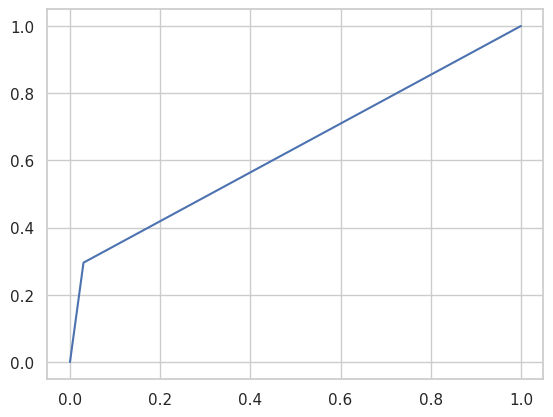

In [365]:
from sklearn import metrics

fpr,tpr,thr = metrics.roc_curve(y_test,y_pred)

print(fpr , tpr, thr)
plt.plot(fpr,tpr)

In [366]:
fpr1, tpr1, thr1 = metrics.roc_curve(y_test,y_test_pred_prob)

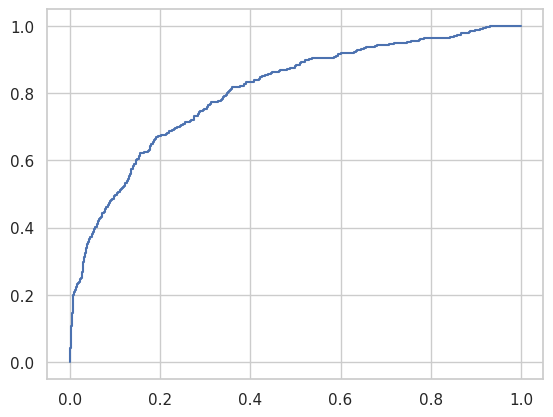

In [367]:
plt.plot(fpr1,tpr1)

In [368]:
test_auc_roc=metrics.roc_auc_score(y_test,y_test_pred_prob)


In [369]:
test_auc_roc

0.8064732452129576

In [370]:
from numpy import argmax

best=tpr1-fpr1

ix=argmax(best)

In [371]:
ix

230

In [372]:
best_thr=thr1[ix]
best_thr

0.25084959341049246

In [373]:
tpr1[ix]

0.6695652173913044

In [374]:
fpr1[ix]

0.19184193753983428